In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',20)

### GETTING HISTORIC DATA

In [2]:
asset = ['BTC-USD']

In [3]:
asset_data = yf.download(asset,start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


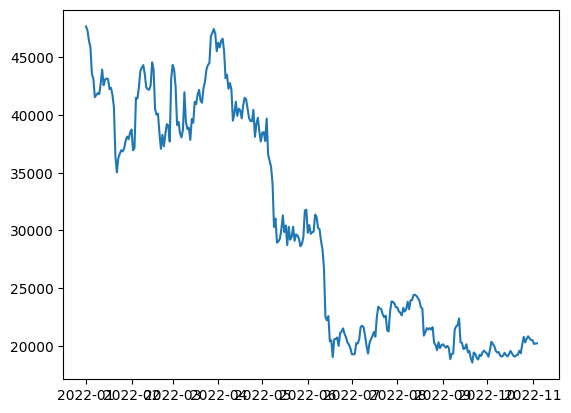

In [4]:
plt.plot(asset_data.Close)

In [4]:
def get_historic_price():
    """
    get historic price data via yahoo finance
    """
    
    asset = ['xrp-usd']
    asset_data = yf.download(asset,start='2020-01-01')
    return asset_data

In [5]:
df = get_historic_price()

[*********************100%***********************]  1 of 1 completed


In [6]:
df.index.astype(str)

Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       ...
       '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
       '2022-11-03', '2022-11-04', '2022-11-05', '2022-11-06', '2022-11-07'],
      dtype='object', name='Date', length=1042)

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.shape

(1042, 6)

In [9]:
df.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2020-01-01,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003
2020-01-02,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426
2020-01-03,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043
2020-01-04,0.193521,0.194653,0.191835,0.194355,0.194355,999331594
2020-01-05,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557


In [10]:
df.dtypes

open         float64
high         float64
low          float64
close        float64
adj close    float64
volume         int64
dtype: object

## visualization

#### we'll visual the price movement, trends and moving averages

 Why Use a Moving Average

    - A moving average helps cut down the amount of noise on a price chart. Look at the direction of the moving average to get a basic idea of which way the price is moving. If it is angled up, the price is moving up (or was recently) overall; angled down, and the price is moving down overall; moving sideways, and the price is likely in a range.

    - A moving average can also act as support or resistance. In an uptrend, a 50-day, 100-day, or 200-day moving average may act as a support level, as shown in the figure below. This is because the average acts like a floor (support), so the price bounces up off of it. In a downtrend, a moving average may act as resistance; like a ceiling, the price hits the level and then starts to drop again. 

In [11]:
df['test_date'] = df.index

In [12]:
df['test_date'] = pd.to_datetime(df.test_date)

In [13]:
df["day"] = df['test_date'].map(lambda x: x.day)
df["month"] = df['test_date'].map(lambda x: x.month)
df["year"] = df['test_date'].map(lambda x: x.year)

In [14]:
df

,open,high,low,close,adj close,volume,test_date,day,month,year
Date,,,,,,,,,,
2020-01-01,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003,2020-01-01,1,1,2020
2020-01-02,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426,2020-01-02,2,1,2020
2020-01-03,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043,2020-01-03,3,1,2020
2020-01-04,0.193521,0.194653,0.191835,0.194355,0.194355,999331594,2020-01-04,4,1,2020
2020-01-05,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557,2020-01-05,5,1,2020
...,...,...,...,...,...,...,...,...,...,...
2022-11-03,0.450885,0.459362,0.450098,0.455135,0.455135,1086924485,2022-11-03,3,11,2022
2022-11-04,0.455141,0.505111,0.453997,0.504404,0.504404,2774226120,2022-11-04,4,11,2022
2022-11-05,0.504433,0.507103,0.492104,0.493330,0.493330,1216193223,2022-11-05,5,11,2022


- The data is from yahoo finance so it doesnt need much augmentation
- we will check if the asset shows seaonality or obvious trends using statsmodels

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [16]:
df

,open,high,low,close,adj close,volume,test_date,day,month,year
Date,,,,,,,,,,
2020-01-01,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003,2020-01-01,1,1,2020
2020-01-02,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426,2020-01-02,2,1,2020
2020-01-03,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043,2020-01-03,3,1,2020
2020-01-04,0.193521,0.194653,0.191835,0.194355,0.194355,999331594,2020-01-04,4,1,2020
2020-01-05,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557,2020-01-05,5,1,2020
...,...,...,...,...,...,...,...,...,...,...
2022-11-03,0.450885,0.459362,0.450098,0.455135,0.455135,1086924485,2022-11-03,3,11,2022
2022-11-04,0.455141,0.505111,0.453997,0.504404,0.504404,2774226120,2022-11-04,4,11,2022
2022-11-05,0.504433,0.507103,0.492104,0.493330,0.493330,1216193223,2022-11-05,5,11,2022


In [32]:
df.close[-365:].describe()

count    365.000000
mean       0.600181
std        0.234888
min        0.308090
25%        0.377964
50%        0.534061
75%        0.786587
max        1.282377
Name: close, dtype: float64

<AxesSubplot:xlabel='Date'>

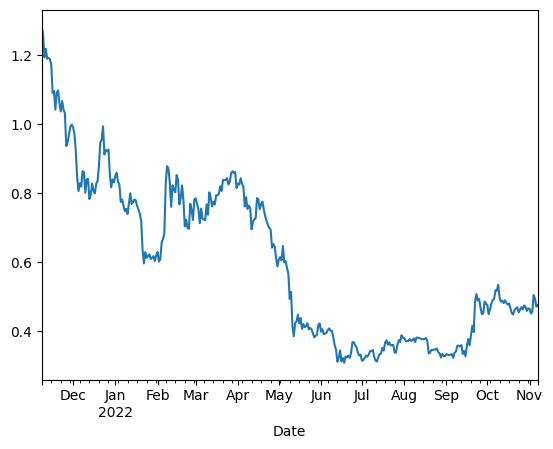

In [34]:
df.close[-365:].plot()

In [17]:
res = seasonal_decompose(df.close[:1037],model='muplicative')

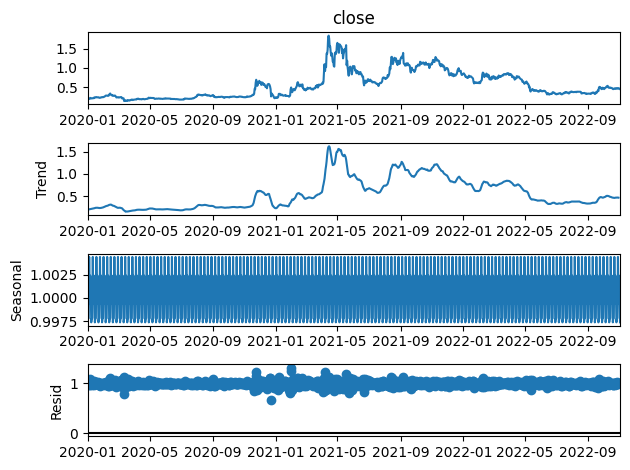

In [18]:
# the below doesnt show any trend to report on and seasonlity is also not clearly present
res.plot();

### ill return these in a function to plot on the dashboard

In [19]:
res.trend

Date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04    0.199936
2020-01-05    0.202273
                ...   
2022-10-29    0.466447
2022-10-30    0.463804
2022-10-31         NaN
2022-11-01         NaN
2022-11-02         NaN
Name: trend, Length: 1037, dtype: float64

In [20]:
res.seasonal

Date
2020-01-01    0.997375
2020-01-02    0.997796
2020-01-03    0.997828
2020-01-04    1.004399
2020-01-05    0.999375
                ...   
2022-10-29    1.004399
2022-10-30    0.999375
2022-10-31    1.002394
2022-11-01    1.000833
2022-11-02    0.997375
Name: seasonal, Length: 1037, dtype: float64

In [21]:
res.resid

Date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04    0.967830
2020-01-05    0.967305
                ...   
2022-10-29    1.004093
2022-10-30    0.989086
2022-10-31         NaN
2022-11-01         NaN
2022-11-02         NaN
Name: resid, Length: 1037, dtype: float64

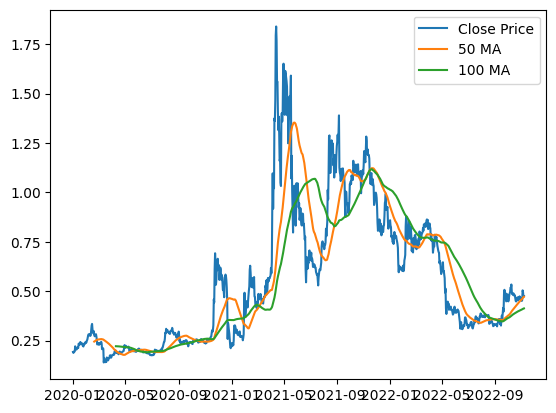

In [22]:
#overall price movement with 50 day moving average
plt.plot(df.close,label='Close Price')
plt.plot(df.close.rolling(50).mean(),label='50 MA')
plt.plot(df.close.rolling(100).mean(),label ='100 MA')
plt.legend()

In [18]:
df['close_50_ma']= df.close.rolling(50).mean()
df['close_100_ma']= df.close.rolling(100).mean()

AttributeError: 'DataFrame' object has no attribute 'close_50_ma'

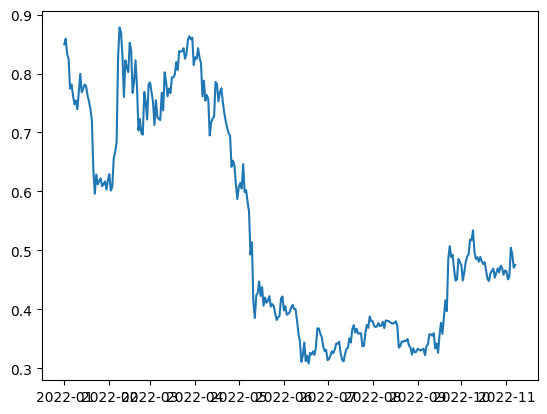

In [35]:
plt.plot(df[df.year==2022].close)
plt.plot(df[df.year==2022].close_50_ma)
plt.plot(df[df.year==2022].close_100_ma)
plt.legend(['Closing Price','50 MA','100 MA'])

I'll track the percent change from day to day

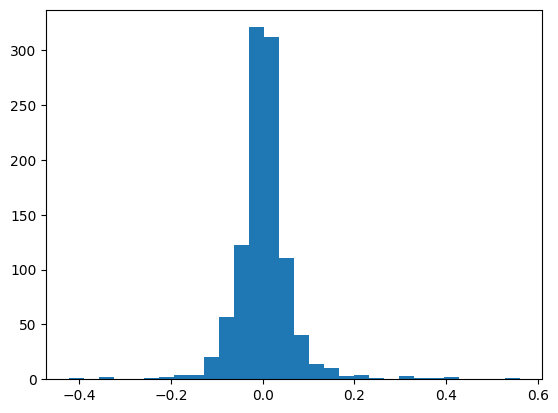

In [20]:
df['close_pct_change'] = df.close.pct_change()
plt.hist(df.close_pct_change,bins=30,)
plt.show()

In [21]:
import seaborn as sns

<Figure size 1200x1200 with 0 Axes>

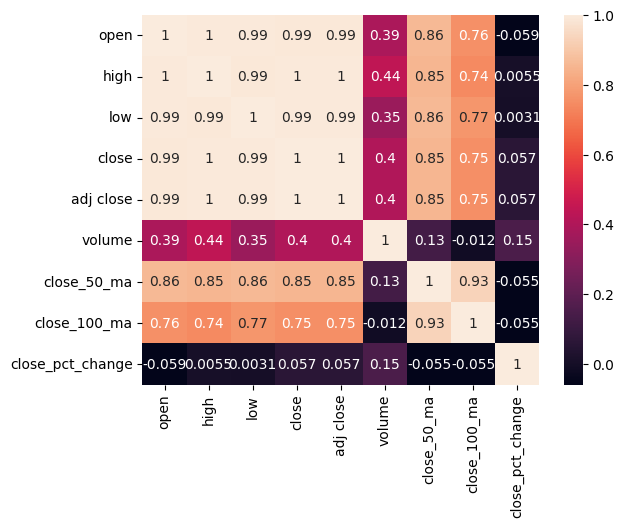

<Figure size 1200x1200 with 0 Axes>

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=[12,12])

#### First we'll test for stationarity using the Dickey Fuller from statsmodels
- if p<0.5:
    - Data is Stationary 
- elif p>0.5 :
    - Data is Not Stationary
- else:
    - idk

In [23]:
#the data is stationary so ill continue to modeling
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
     dftest = adfuller(df, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\n",key, ": ", val)
        
adf_test(df.close)

1. ADF :  -2.329620995458136
2. P-Value :  0.16259247462403986
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression: 1016
5. Critical Values :

 1% :  -3.436802656106708

 5% :  -2.8643889233382502

 10% :  -2.5682868944525388


In [24]:
# we'll use 3 models linear regression, ARIMA, and a NN

In [2]:
df

NameError: name 'df' is not defined

### OLS?

### ARIMA MODELING

In [27]:
sarima_df = get_historic_price()
sarima_df.columns = sarima_df.columns.str.lower()

[*********************100%***********************]  1 of 1 completed


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [29]:
train = sarima_df[sarima_df.index <= pd.to_datetime("2022-05-01", format='%Y-%m-%d')].close
test = sarima_df[sarima_df.index >= pd.to_datetime("2022-05-02", format='%Y-%m-%d')].close
y_sari = train

#### how to choose the order

In [30]:
sarima = SARIMAX(y_sari,order = (2, 0, 2), seasonal_order=(2,2,2,12))

/home/human/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/human/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [31]:
sarima = sarima.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.00014D-01    |proj g|=  4.72445D+00


 This problem is unconstrained.



At iterate    5    f= -1.10773D+00    |proj g|=  1.98331D+00

At iterate   10    f= -1.18371D+00    |proj g|=  1.75239D+00

At iterate   15    f= -1.25536D+00    |proj g|=  1.73004D-01

At iterate   20    f= -1.27012D+00    |proj g|=  1.07970D-01

At iterate   25    f= -1.27043D+00    |proj g|=  1.70858D-02

At iterate   30    f= -1.27050D+00    |proj g|=  6.35657D-02

At iterate   35    f= -1.27058D+00    |proj g|=  7.67320D-02

At iterate   40    f= -1.27109D+00    |proj g|=  3.40764D-02

At iterate   45    f= -1.27113D+00    |proj g|=  6.92408D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     64   

In [131]:
y_pred = sarima.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = sarima.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

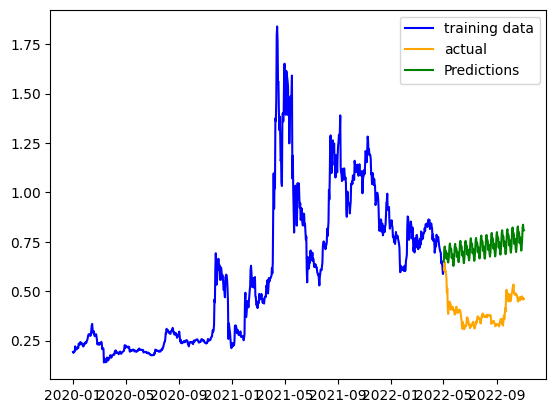

In [132]:
plt.plot(train, color='blue', label = 'training data')
plt.plot(test, color='orange', label = 'actual')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)